In [5]:
import pandas as pd
import numpy as np

data = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header = 0, parse_dates=[0])

In [6]:
df = data.copy()

In [7]:
df

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462
...,...,...
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595


# Downsampling

In [18]:
df_quat = df.resample('Q', on = 'Month').mean()

In [19]:
df_quat.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [13]:
df_year = df.resample('A', on = 'Month').sum()

In [15]:
df_year

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515
1968-12-31,128975
1969-12-31,143664
1970-12-31,157497


# Upsampling

In [22]:
df_day = df.resample('D', on = 'Month').mean()

In [28]:
df_day.head(10)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [30]:
# For straight Line Intrapolation

intrapolated_df = df_day.interpolate(method='linear')

In [27]:
intrapolated_df.head(10)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


<Axes: xlabel='Month'>

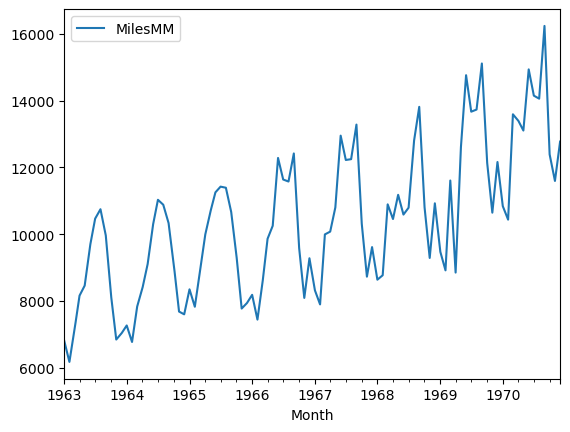

In [29]:
intrapolated_df.plot()

<Axes: xlabel='Month'>

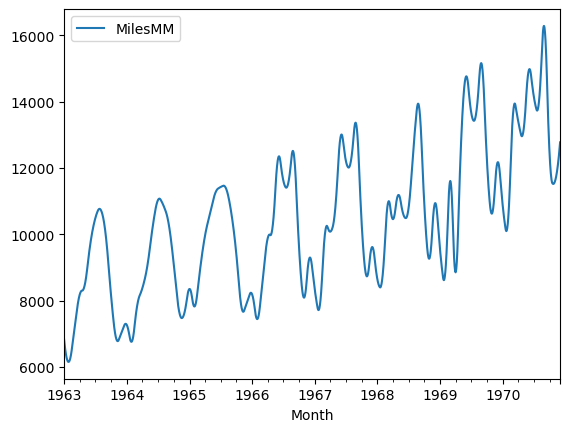

In [32]:
curve_intrapolated_df = df_day.interpolate(method='spline', order = 2) # Quadratic Line

curve_intrapolated_df.plot()

<Axes: xlabel='Month'>

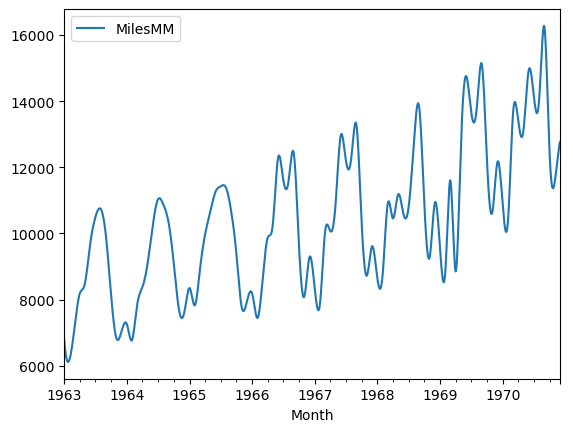

In [33]:
curve_intrapolated_df = df_day.interpolate(method='spline', order = 3) # Cubic Line

curve_intrapolated_df.plot()